# Kaggle Zillow Preprocessing by month

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

%matplotlib inline

##### Import Data

In [2]:
df_train = pd.read_csv('../data/train_2016_v2.csv')
prop = pd.read_csv('../data/properties_2016.csv')
sample = pd.read_csv('../data/sample_submission.csv')

C:\Users\WBirmingham\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_train = pd.merge(df_train, prop, on='parcelid', how='left')

sample.rename(index=str, columns={'ParcelId': 'parcelid'}, inplace=True)
df_test = sample.merge(prop, on='parcelid', how='left')

print(df_test.shape)
print(df_train.shape)

(2985217, 64)
(90275, 60)


In [4]:
df_train['transactiondate'] =  pd.to_datetime(df_train['transactiondate'])
df_train['transaction_year'] = df_train.transactiondate.dt.year.astype(np.int16)
df_train['transaction_month'] = df_train.transactiondate.dt.month.astype(np.int8)
df_train['transaction_day'] = df_train.transactiondate.dt.weekday.astype(np.int8)

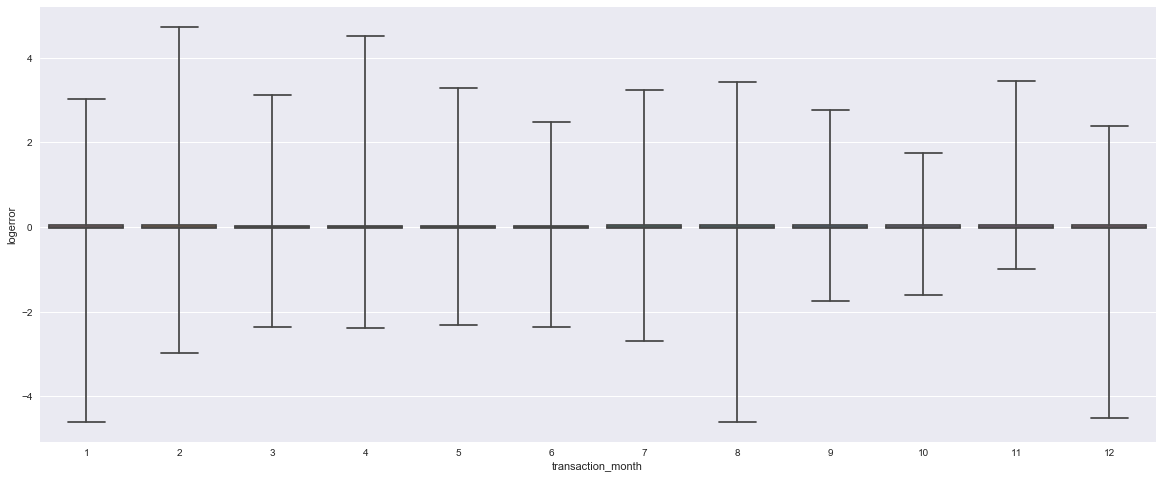

In [5]:
plt.subplots(figsize=(20, 8))
sns.boxplot(x="transaction_month", y="logerror", data=df_train, whis=np.inf)

In [6]:
((df_train[df_train.transaction_month == 1].isnull().sum() / 
  len(df_train[df_train.transaction_month == 1]))
).sort_values(ascending=False)

buildingclasstypeid             1.000000
finishedsquarefeet13            0.999847
yardbuildingsqft26              0.999542
storytypeid                     0.999390
basementsqft                    0.999390
fireplaceflag                   0.997407
architecturalstyletypeid        0.996797
typeconstructiontypeid          0.996339
finishedsquarefeet6             0.994966
decktypeid                      0.991306
poolsizesum                     0.990848
pooltypeid10                    0.986577
pooltypeid2                     0.985357
taxdelinquencyflag              0.974985
taxdelinquencyyear              0.974985
yardbuildingsqft17              0.973307
hashottuborspa                  0.971934
finishedsquarefeet15            0.958511
finishedsquarefeet50            0.930445
finishedfloor1squarefeet        0.930445
fireplacecnt                    0.899939
threequarterbathnbr             0.868670
pooltypeid7                     0.820470
poolcnt                         0.805827
numberofstories 

In [7]:
df_train.regionidcounty.describe()

count    90275.000000
mean      2525.420770
std        805.694842
min       1286.000000
25%       1286.000000
50%       3101.000000
75%       3101.000000
max       3101.000000
Name: regionidcounty, dtype: float64

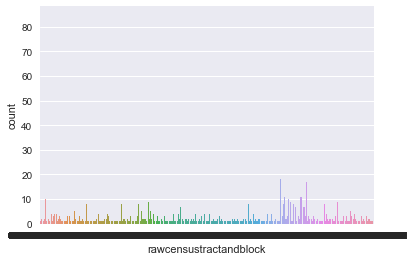

In [8]:
sns.countplot(x = 'rawcensustractandblock', data = df_train)

## Create features from 'rawcensustractandblock'
BLOCKID:  15-character code that is the concatenation of fields consisting of the 2-character state FIPS code, the 3-character county FIPS code, the 6-character census tract code, and the 4-character tabulation block code.

In [9]:
df_train['rawcensustractandblock_states'] = df_train.rawcensustractandblock.astype(str).apply(lambda x: ('00'+x[:1])[-2:])
df_train['rawcensustractandblock_countries'] = df_train.rawcensustractandblock.astype(str).apply(lambda x: x[1:4])
df_train['rawcensustractandblock_tracts'] = df_train.rawcensustractandblock.astype(str).apply(lambda x: x[4:11])
df_train['rawcensustractandblock_blocks'] = df_train.rawcensustractandblock.astype(str).apply(lambda x: x[11:])

In [10]:
c_tmp = []
for c in df_train.columns:
    if 'rawcensustractandblock' in c:
        c_tmp.append(c)
        
df_train[c_tmp].head()

,rawcensustractandblock,rawcensustractandblock_states,rawcensustractandblock_countries,rawcensustractandblock_tracts,rawcensustractandblock_blocks
0,6.037107e+07,06,037,1066.46,1
1,6.059052e+07,06,059,0524.22,2
2,6.037464e+07,06,037,4638.00,3
3,6.037296e+07,06,037,2963.00,2
4,6.059042e+07,06,059,0423.38,1


In [11]:
df_train[df_train.rawcensustractandblock_countries == '111'][c_tmp].head()

,rawcensustractandblock,rawcensustractandblock_states,rawcensustractandblock_countries,rawcensustractandblock_tracts,rawcensustractandblock_blocks
7,6.111003e+07,06,111,0031.00,21
16,6.111007e+07,06,111,0074.05,2
67,6.111008e+07,06,111,0083.04,1
74,6.111007e+07,06,111,0068.00,2
85,6.111004e+07,06,111,0036.09,21
